<a href="https://colab.research.google.com/github/kdh2769/hello-world/blob/main/Chapter01_ComputerVision_and_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 01 Computer Vision & Nueral Network

- Hyper 동아리에서 활용하는 자료입니다
- 작성자 : 소프트웨어융합학과 18학번 문희준
- 잘못된 내용이나 오타에 대한 feedback은 대환영입니다^^ 


## 신경망 시작하기

인공 신경망(NN or ANN)은 정보를 처리하는 일, 일반적인 패턴을 인식하거나 새로운 패턴을 탐지하는 일, 복잡한 절차를 근접시키는 일에 탁월한 강력한 머신러닝의 도구이다

## 뉴런 복제하기
초기의 인공신경망은 사람의 뉴런을 형상화 하려했다. 아래 그림과 같이 인공 신경망은 **주어진 입력에 대해, 주어진 가중치를 이용하여 결과값을 도출한다**

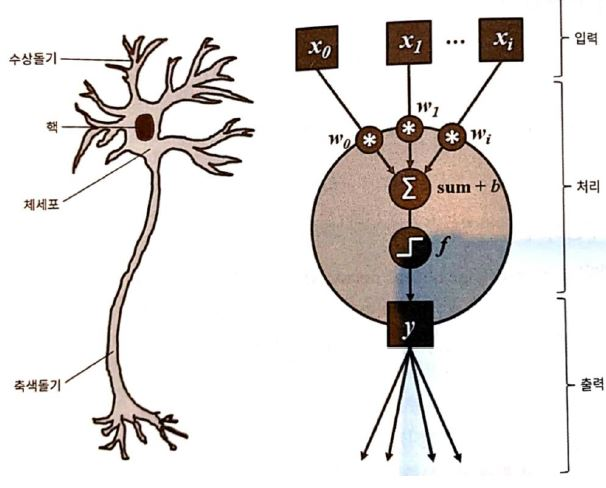




위에서 일어나는 일련의 과정을 다음과 같이 표현할 수 있다<br>
**H(x) = WX + b**<br>
x = (x0, x1) w(transpose) = (w0, w1)<br><br>
가중치 백터와 입력 백터를 내적하여 결과값 H(X)를 얻을 수 있다. 이제 마지막으로 뉴런의 출력을 얻기 위해 **활성화 함수(activation function)**을 통과하면 된다.<br>
활성화 함수의 종류는 크게 4가지가 있다

1.   Step function
2.   Sigmoid function
3.   Hyperbolic tangent
4.   ReLU

계단 함수의 경우 z가 임계값 t보다 크면 f(z) = 1. t보다 작으면 f(z) = 0의 값을 가지고, 모양이 마치 계단과 같이 생겨서 계단함수라 부른다







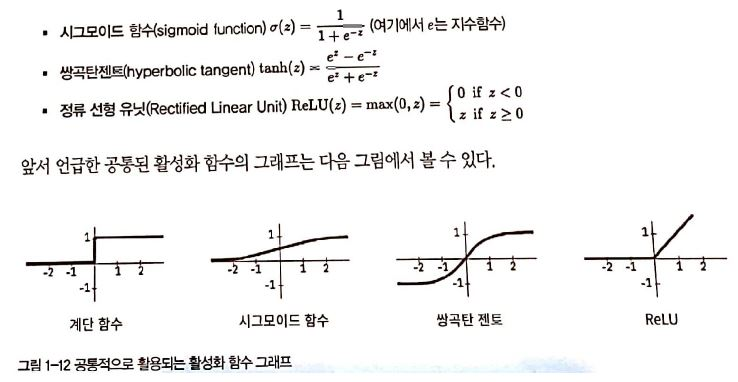

## 구현
이제 인공 뉴런의 값을 위와 같이 얻었으면 다른 인공 뉴런으로 전달해 줘야 한다. 이 과정을 **forward**라 부른다. 아래와 같이 numpy를 이용하여 간단히 구현할 수 있습니다.

In [1]:
import numpy as np

class Neuron(object):
  '''simple forward Neuron
  
  Args(입력): 
      num_inputs(int) : 입력 벡터 크기 / 입력 값 개수
      activation_fn : 사용할 활성화 함수
  
  Attributes(속성):
      W (ndarray) : 각 입력에 대한 가중치
      b (float) : Bias. 가중합에 더해진다
      activation_fn (callable) : 활성화 함수
  '''
  
  # 랜덤값으로 가중치 벡터와 bias를 초기화 함
  def __init__(self, num_inputs, activation_fn):
    super().__init__()
    self.W = np.random.rand(num_inputs) # 주어진 특징 벡터 차원과 맞게 가중치를 0~1사이로 random하게 초기화한다
    self.b = np.random.rand(1) # bias 초기화
    self.activation_fn = activation_fn
  
  # 뉴런을 통해 입력 신호를 전달
  def forward(self, x):
    z = np.dot(x, self.W) + self.b # Z = WX + b
    return self.activation_fn(z) # 활성화 함수를 통과시킴

In [2]:
# 결과가 같게 나오기 위해서 random seed를 고정한다
np.random.seed(42)
# 3개의 random 입력을 행으로 받을 수 있는 배열 (shape = (1,3))
x = np.random.rand(3).reshape(1,3)
print(x) # 임의로 만든 입력 벡터 출력

[[0.37454012 0.95071431 0.73199394]]


In [3]:
# Step function 정의
step_fn = lambda y: 0 if y<=0 else 1 # 0을 기준으로 크면 1 작으면 0의 값을 가진다

# Perceptron을 instance화 시킨다
perceptron = Neuron(num_inputs=x.size, activation_fn=step_fn) # 계단함수를 활성화 함수로 사용

out = perceptron.forward(x) # 뉴련의 출력 값
print(out) 

1


**위와 같이 forward 값이 1이 나오는 것을 확인할 수 있었습니다.**<br>
이제 여려분이 위의 코드를 입력하여 결과값을 실제로 확인하세요<br>
**반드시 직접 코드를 타이핑하세요! 안그러면 공부의 효과가 없습니다!**

In [4]:
# Do yourself!
class Nu(object):
    def __init__ (self, num_inputs,activation_fn):
        super().__init__()
        self.W = np.random.rand(num_inputs)
        self.b = np.random.rand(1)
        self.activation_fn = activation_fn
        
    def forward (self, x):
        z = np.dot(x, self.W) + self.b
        return self.activation_fn(z)

In [5]:
np.random.seed(123)

x = np.random.rand(3).reshape(1, 3)
x

array([[0.69646919, 0.28613933, 0.22685145]])

In [6]:
step_fn = lambda  y :0 if y <= 0 else 1
perceptron = Nu(num_inputs=x.size, activation_fn= step_fn)
out = perceptron.forward(x)

print (out)

1


## 뉴런을 계층화하기
일반적으로 Neural network는 동일한 입력을 받고 동일한 연산을 하는 뉴런의 집합으로 구성됩니다.<br>
아래의 그림에서 network는 1개의 입력 계층과 출력 계층. 그리고 3개의 은닉 계층(**hidden layer**)을 가지고 있습니다.<br>
입력 계층과 1번째 은닉 계층이 연결되어 있고 계속해서 출력 계층까지 뉴런들이 연결되어 있는 것을 볼 수 있습니다. 특히 아래의 은닉 계층은 **각 뉴런이 이전 계층에서 나온 모든 값에 연결되어 있는 것을 확인할 수 있고, 이를 Fully-connected layer 혹은 dense-layer라 합니다**<br>

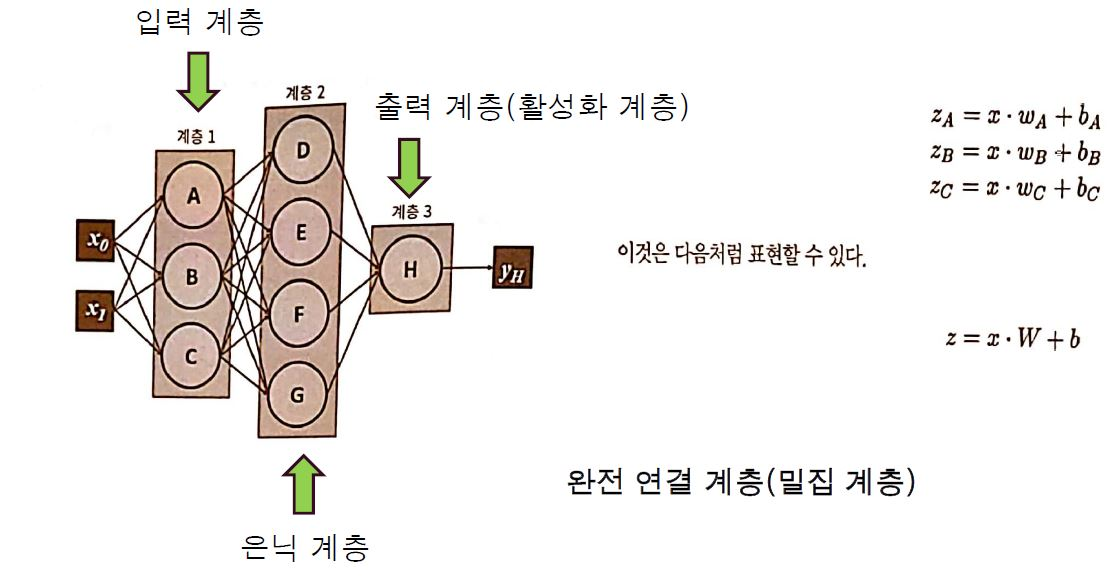

### multi layer의 구현
단일 뉴런처럼 multi-layer도 구현할 수 있습니다

In [7]:
import numpy as np

class FullyConnectedLayer(object):
  '''simple forward Neuron
  
  Args(입력): 
      num_inputs(int) : 입력 벡터 크기 / 입력 값 갯수
      layer size(int) : 출력 벡터의 크기 / 뉴런의 갯수
      activation_fn : 사용할 활성화 함수
  
  Attributes(속성):
      W (ndarray) : 각 입력에 대한 가중치
      b (float) : Bias. 가중합에 더해진다
      activation_fn (callable) : 활성화 함수
  '''
  
  # 랜덤값으로 가중치 벡터와 bias를 초기화 함
  def __init__(self, num_inputs, layer_size, activation_fn):
    super().__init__()
    self.W = np.random.standard_normal(num_inputs) # 주어진 특징 벡터 차원과 맞게 가중치를 정규 분포를 이용하여 초기화한다
    self.b = np.random.standard_normal(layer_size) # bias 초기화
    self.size = layer_size # network속 뉴런의 갯수
    self.activation_fn = activation_fn
  
  # 뉴런을 통해 입력 신호를 전달
  def forward(self, x):
    z = np.dot(x, self.W) + self.b # Z = WX + b
    return self.activation_fn(z) # 활성화 함수를 통과시킴

FullyConnectLayer는 class Neuron 일부 변수의 차원을 조정하였습니다.<br>
아래는 FCLayer를 instance화 하는 과정입니다

In [8]:
# 결과가 같게 나오기 위해서 random seed를 고정한다
np.random.seed(42)
# 2개의 random 입력을 행으로 받을 수 있는 배열 (shape = (1,2))
# -1~1 사이의 임의의 실수값으로 초기화한다
x1 = np.random.uniform(-1, 1, 2).reshape(1,2)
x2 = np.random.uniform(-1, 1, 2).reshape(1,2)
# 임의로 만든 입력 벡터 출력
print('x1:', x1) 
print('x2:', x2)

x1: [[-0.25091976  0.90142861]]
x2: [[0.46398788 0.19731697]]


In [9]:
# ReLU함수 정의
relu_fn = lambda y: np.maximum(y, 0) # 0보다 작은 값은 0, 큰 경우는 y = x이다

# instance화
layer = FullyConnectedLayer(2, 3, relu_fn)

# 각 input(x1, x2)에 대한 출력값 출력
out1 = layer.forward(x1)
print('out1:',out1)
out2 = layer.forward(x2)
print('out2:',out2)

out1: [1.42690877 0.61513069 0.        ]
out2: [1.42436929 0.61259121 0.        ]


다음과 같이 x1, x2(2차원)에 대한 FCLayer의 출력값(3차원)을 얻었습니다<br>
자, 이제 여러분이 직접 위의 코드를 쳐보고 결과를 확인하세요! <br>
out1, out2의 값은 다르게 나올 수 있습니다!


In [10]:
# Do yourself!
class FullyConnectedLayer (object):
    def __init__(self, num_inputs, layer_size, activation_fn):
        super().__init__()
        self.W= np.random.standard_normal((num_inputs, layer_size))
        self.b =  np.random.standard_normal(layer_size)
        self.size = layer_size
        self.activation_fn = activation_fn
        
    def forward (self, x):
        z = np.dot (x, self.W) + self.b
        return self.activation_fn(z)

In [11]:
np.random.seed(42)

x1 = np.random.uniform(-1, 1, 2).reshape(1, 2)
x2 = np.random.uniform(-1, 1, 2).reshape(1, 2)

print (x1)
print (x2)
relu_fn = lambda y: np.maximum(y, 0)

layer = FullyConnectedLayer(2, 3, relu_fn)
out1 = layer.forward(x1)
out2 = layer.forward(x2)
print (out1)
print (out2)
x12 = np.concatenate((x1, x2))
out12 = layer.forward(x12)
print (out12)

[[-0.25091976  0.90142861]]
[[0.46398788 0.19731697]]
[[0.28712364 0.         0.33478571]]
[[0.         0.         1.08175419]]
[[0.28712364 0.         0.33478571]
 [0.         0.         1.08175419]]


## 예제 신경망을 분류에 적용하기
이제 MMNIST 손글씨 데이터셋을 가지고 실제로 모델을 만들고 훈련시키는 연습을 해보겠습니다! MNIST 손글씨 데이터셋은 28 X 28 pixel의 이미지가 7만개가 있습니다.<br> **숫자를 분류하기 위해 필요한 작업은 이 이미지중 하나를 입력으로 받아서 네트워크가 해당 이미지가 각 클래스에 대응하는지를 확신하는 정도의 출력 벡터로 반환하는 것입니다**<br>
 우리는 hidden-layer의 크기와 사이즈를 정해주기만 하면 됩니다<br>
 아래와 같이 먼저 데이터셋을 로딩하고 네트워크를 만들어 보겠습니다<br>

In [12]:
import numpy as np
import tensorflow as tf
np.random.seed(42)

# 훈련 집합과 테스트 집합 설정
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_classes = 10 # 숫자 0부터 9까지 총 10개의 class로 분류

# 이미지를 NN를 위한 column 벡터로 변환
X_train, X_test = X_train.reshape(-1, 28*28), X_test.reshape(-1, 28*28)
# train label을 one-hot encoding 벡터로 변환
y_train = np.eye(num_classes)[y_train]

11493376/11490434 [==============================] - 0s 0us/step


## Network 구현하기

In [13]:
# sigmoid 함수 정의
def sigmoid(x):
  return 1 / (1 + np.exp(-x)) # y

class SimpleNetwork(object):
  def __init__(self, num_inputs, num_outputs, hidden_layers_size = (64,32)):
    super().__init__()
    # network를 구성하는 계층 리스트 구성
    sizes = [num_inputs, *hidden_layers_size, num_outputs]
    # 각 layer마다 이전 레이어을 input으로 한 forward 결과값을 저장하기 위한 setting
    # 입력 layer에는 저장되지 않는다
    self.layers = [
      FullyConnectedLayer(sizes[i], sizes[i+1], sigmoid) for i in range(len(sizes) - 1)                 
    ]

  def forward(self, x):
    ''' 입력 벡터 x를 계층을 통해 전달'''
    for layer in self.layers:
      x = layer.forward(x)
    return x

  # x에 대응하는 출력을 계산하고 출력값이 가장 큰 인덱스를 반환하여 class로 분류한다
  def predict(self, x):
    estimations = self.forward(x)
    best_class = np.argmax(estimations)
    return best_class

  # test data를 활용하여 Network의 accuracy를 평가한다
  def evaluate(self, X_test, y_test):
    num_corrects = 0
    for i in range(len(X_test)):
      if self.predict(X_test[i]) == y_test[i]: # 정답을 맞출 때
        num_corrects += 1
    return num_corrects / len(X_test)


위와 같이 feed forward neural network를 구현하였습니다. 이제 mnist dataset을 적용해보죠!

In [14]:
mnist_classifier = SimpleNetwork( 28 * 28, num_classes, [64,32]) #  크기가 64,32인 hidden layer가 2개 있다
acc = mnist_classifier.evaluate(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc * 100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 10.95%


위의 결과로 정확도가 상당히 낮은 것을 알 수 있습니다. 이는 신경망의 매개변수를 임의로 정하였기 때문에 당연합니다.<br> 정확도를 높이기 위해서는 신경망을 훈련시켜야 합니다<br>
이제 여러분 차례입니다! 위와 같이 Network구현을 똑같이 실행해보세요!

In [15]:
# Do yourself!

np.random.seed(123)

mnist = tf.keras.datasets.mnist

(X_train, y_train),  (X_test, y_test) = mnist.load_data()
num_classes = 10
X_train , X_test = X_train.reshape (-1, 28 * 28), X_test.reshape(-1, 28 * 28)
y_train = np.eye (num_classes)[y_train]


In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class SimpleNetwork(object):
    def __init__ (self, num_inputs, num_outputs, hidden_layer_sizes = (64, 32)):
        super().__init__()
        sizes = [num_inputs, *hidden_layer_sizes, num_outputs]
        self.layers = [FullyConnectedLayer(sizes[i], sizes[i +1], sigmoid)
        for i in range(len(sizes) -1)]
        
    def forward (self, x):
        for layer in self.layers : 
            x = layer.forward(x)
        return x

    def predict(self, x):
        estimations = self.forward(x)
        best_class = np.argmax(estimations)
        return best_class
    
    def evalute_accuracy(self, X_val, y_val):
        num_corrects = 0
        for i in range (len(X_val)):
            if self.predict(X_val[i]) == y_val[i]:
                num_corrects += 1 
        return num_corrects / len(X_val)


In [17]:
mnist_classifier = SimpleNetwork(X_train.shape[1], num_classes, [64, 32])
accuracy = mnist_classifier.evalute_accuracy (X_test, y_test)
print (f"accuracy = {accuracy * 100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


accuracy = 8.92%


## 신경망 훈련시키기
신경망을 훈련시키는 방법으로는 크게 3가지 방법이 있습니다<br>


---



#### 1) 지도학습 (supervised Learning)
: 가장 보편적이며 이해하기 쉽습니다. 예측된 레이블(결과)와 실제 레이블(정답)을 비교하여, 얼마나 잘못하였는지 평가(=**손실**)할 수 있습니다. 이 손실(Cost)를 줄이기 위해서 Network의 매개변수(가중치, bias)를 조정하고, 네트워크의 accuracy가 임계값에 도다를때까지, 위의 과정을 반복합니다


---


#### 2) 비지도학습 (Unsupervised Learning)
: 지도학습과는 달리 **label(실제 정답)이 주어지지 않습니다.** 즉 신경망이 스스로 분류한 결과를 우리는 얻게 됩니다. 비지도학습은 주로 **clustering(군집화)나 차원 축소(dimension reduction)에 많이 사용됩니다**


---


#### 3) 강화학습 (Reinforced Learning)
: 강화 학습은 상호 작용에 기반한 학습입니다. 즉, **일단 해보면서 개선해나가는 것**이 핵심 아이디어입니다. 더 많은 보상을 얻을 수 있게 만드는 것을 통해, 알아서 똑똑해지는 기계를 만들 수 있습니다. 자세한 내용은 기계학습에서 참고하세요!





## 네트워크 훈련

### Cost function (비용 함수)
: 비용 함수의 목표는 현재의 가중치로 얼마나 잘 동작하는지 평가하는 것입니다. 우리는 최적해를 찾기 위해서 주로 비용함수를 이용합니다. Cost가 가장 낮은 점이 최적해가 됩니다. <br>
우리가 많이 사용하는 cost function으로는 MSE, Binary cross-entropy 등이 있습니다.<br>
**손실함수의 가장 중요한 점은 항상 convex(아래로 볼록)해야 한다는 점입니다** 이 이유로는 뒤에서 다시 설명드리겠습니다<br>


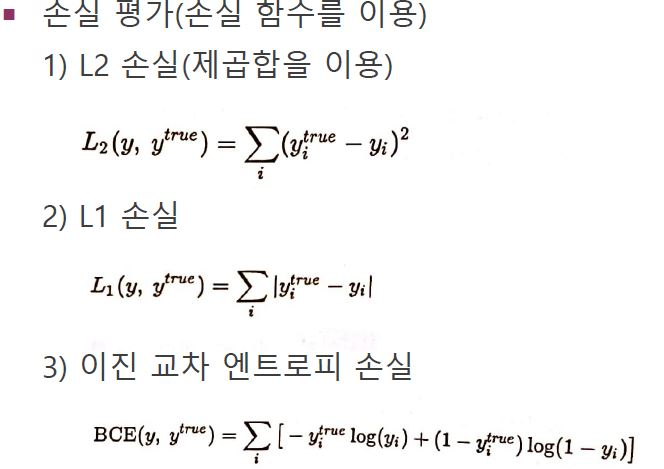

### Back propagation
어떻게 하면 network 매개변수를 업데이트 해 손실을 최소화할 수 있을까요?<br>
흔히 사용되는 방법은 바로 **Gradient Descent(경사 하강법)**입니다. 즉, **cost fucnntion의 gradient(미분값)**을 이용하는 것입니다. cost function의 경사를 따라 내려가면 우리는 최적해를 찾을 수 있습니다. 이것이 바로 gradient descent입니다!<br>
 아래 그림을 보면, 현재 (1)지점에서 경사를 따라서 계속 내려가다 보면 **최저점(Global minimum)**에 도달하는 것을 볼 수 있습니다. 이 지점이 **최적해**가 되겠지요? <br>
 이전에 cost function의 주의점으로는 항상 **convex**해야 한다고 설명드렸습니다. 이 이유로는 아래 그림에서 극소값이 2개가 존재하는데, 만약 아래와 달리 1번째 극솟값보다 2번째 극솟값이 더 작으면, 신경망은 1번째 점을 최적해로 판단하고(실제는 2번째가 최적해) 학습을 끝내는 문제가 발생합니다!<br> **즉, Gloabal minimum에서 학습이 종료되지 않고, local minimum(지역 최소점)에서 학습이 종료된다는** 문제가 발생하므로, 항상 Convex하여야 이러한 문제가 발생하지 않습니다!<br>
 

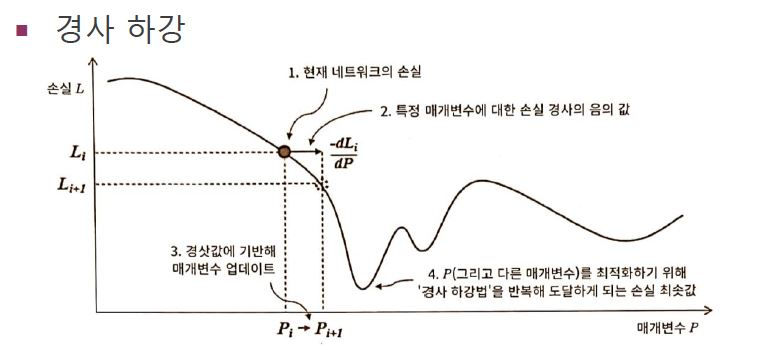

그럼 gradient를 통해서 어떻게 network의 매개변수 값을 조정할까요?<br>
바로 가중치 값을 (학습률) X (cost function의 Gradient) 한 값으로 빼주면 됩니다.<br>
학습률(learning rate)은 사용자가 정해줘야 하며, 이 값은 경험에 의해 알아야 합니다. 학습을 시키면서 learning rate를 조절하면서 모델의 성능을 개선할 수 있습니다. 만약 학습률이 너무 크면, 네트워크가 빠르게 학습하지만 조정폭이 너무 커서 최적해를 놓칠 수 있습니다. 반대로 너무 작으면, 학습은 너무 천천히 하게 됩니다. 따라서 적당한 값을 모델을 돌려보면서 찾습니다. 통상적으로 0.01을 많이 하며, 0.1, 1, ...등으로 늘리거나 0.001, ...등으로 줄일 수 있습니다 <br> 

Network가 학습하는 과정을 다음과 같이 summary 해보겠습니다!<br>
1. n개의 훈련 데이터를 network에 제공한다<br>
2. chain-rule을 사용하여 cost를 계산하고, backpropagation을 통하여 gradient값을 얻는다<br>
3. 해당 미분값을 이용하여 매개변수를 업데이트한다<br>
4. 전체 훈련집합에 대해 1~3단계를 반복한다<br>
5. 조건을 만족할때까지 1~4단계를 반복한다<br>

전체 훈련 집합을 1회 반복하는 것을 **epoch**이라 합니다.<br>
전체 훈련 집합을 쪼개어서 학습하는 것을 **mini-batch**라 하며, divide&conquer 개념이라 생각하면 됩니다!

## 신경망에 분류하는 방법 가르치기
앞에서는 forward 기능만 구현하였습니다. 이제 backPropagation과 optimization method를 추가해봅시다!

In [18]:
class FullyConnectedLayer(object):

  # 기존의 코드와 거의 유사
  def __init__(self, num_inputs, layer_size, activation_fn, d_activation_fn):
    super().__init__()
    self.W = np.random.standard_normal((num_inputs, layer_size)) 
    self.b = np.random.standard_normal(layer_size) 
    self.size = layer_size 
    self.activation = activation_fn
    self.d_activation_fn = d_activation_fn # 활성화 함수의 도함수
    self.x, self.y, self.dL_dW, self.dL_db = 0, 0, 0, 0 # 스토리지 속성
  
  # 뉴런을 통해 입력 신호를 전달
  def forward(self, x):
    z = np.dot(x, self.W) + self.b
    self.y = self.activation(z) 
    self.x = x # 역전파를 위해 값을 저장
    return self.y

  # 손실을 역전파 -> chain rule을 활용한다
  def backward(self, dL_dy):
      # chain rule
      dy_dz = self.d_activation_fn(self.y) # f'
      dL_dz = (dL_dy * dy_dz) # dL/dz = dL/dy * dy/dz = l'_{k+1} * f'
      dz_dw = self.x.T
      dz_dx = self.W.T
      dz_db = np.ones(dL_dy.shape[0]) # dz/db = d(W.x + b)/db = 0 + db/db = "ones"-vector 

      # 계층 매개변수 dL, w, r, t를 계산하고 저장한다
      self.dL_dW = np.dot(dz_dw, dL_dz)
      self.dL_db = np.dot(dz_db, dL_dz)

      # 미분값 w,r,t와 이전 계층의 x를 계산:
      dL_dx = np.dot(dL_dz, dz_dx)
      return dL_dx

  # 계층의 매개변수 w,r,t 미분값을 최적화 
  def optimize(self, lr): # lr: learning rate
    self.W -= lr * self.dL_dW
    self.b -= lr * self.dL_db

In [19]:
# 시그모이드 도함수
def derivated_sigmoid(y):
  return y * (1-y)

# L2 loss 함수
def loss_L2(pred, target):
  return np.sum(np.square(pred-target)) / pred.shape[0]

# L2 loss  도함수
def derivated_loss_L2(pred, target):
  return 2 * (pred-target)  

In [20]:
class SimpleNetwork(object):
  def __init__(self, num_inputs, num_outputs, hidden_layers_size = (64,32), activation_function=sigmoid, derivated_activation_function=derivated_sigmoid,
               loss_fn=loss_L2, d_loss_fn = derivated_loss_L2):
    super().__init__()
    sizes = [num_inputs, *hidden_layers_size, num_outputs]
    self.layers = [
      FullyConnectedLayer(sizes[i], sizes[i+1], activation_function, derivated_activation_function) for i in range(len(sizes) - 1)                 
    ]
    self.loss_fn, self.d_loss_fn = loss_fn, d_loss_fn

  def forward(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

  # 마지막 계층에서 처음 계층까지 손실 미분값을 역전파
  def backward(self, dL_dy):
    for layer in reversed(self.layers):
      dL_dy = layer.backward(dL_dy)
    return dL_dy

  # 저장된 gradient값에 따라 매개변수 최적화
  def optimize(self, lr):
    for layer in self.layers:
      layer.optimize(lr)

  def predict(self, x):
    estimations = self.forward(x)
    best_class = np.argmax(estimations)
    return best_class

  def evaluate(self, X_test, y_test):
    num_corrects = 0
    for i in range(len(X_test)):
      if self.predict(X_test[i]) == y_test[i]: 
        num_corrects += 1
    return num_corrects / len(X_test)

  def train(self, X_train, y_train, X_val = None, y_val = None, batch_size=32, num_epochs=5, learning_rate=1e-3 ):
    
    # 제공된 데이터셋에서 네트워크를 훈련하고 평가
    num_batches_per_epoch = len(X_train) ## // Batch size
    loss = []
    for i in range(num_epochs): # 각 epoch마다
      epoch_loss = 0
      for b in range(num_batches_per_epoch):
        # 배치 가져오기
        b_idx = b * batch_size # batch start index
        b_idx_e = b_idx + batch_size # batch end index
        x, y_true = X_train[b_idx:b_idx_e], y_train[b_idx:b_idx_e]
        # 배치에 최적화
        y = self.forward(x)
        epoch_loss += self.loss_fn(y, y_true) # 예측값과 실제값 비교
        dL_dy = self.d_loss_fn(y, y_true)
        self.backward(dL_dy) # = 역전파
        self.optimize(learning_rate) # 최적화

      loss.append(epoch_loss / num_batches_per_epoch)
      # epoch마다 정확도를 측정
      accuracy = self.evaluate(X_val,y_val)
      print("Epoch {:4d}: training loss = {:.6f} | val accuracy = {:.2f}%".format(i, loss[i], accuracy * 100))

위와 같이 모든것이 준비되었습니다. 이제 성능을 확인해봅시다!

In [21]:
mnist_classifier = SimpleNetwork(28 * 28, num_classes) #  크기가 64,32인 hidden layer가 2개 있다
mnist_classifier.train(X_train, y_train, X_test, y_test, num_epochs=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Epoch    0: training loss = nan | val accuracy = 17.80%
Epoch    1: training loss = nan | val accuracy = 24.30%
Epoch    2: training loss = nan | val accuracy = 39.58%
Epoch    3: training loss = nan | val accuracy = 47.05%
Epoch    4: training loss = nan | val accuracy = 51.53%
Epoch    5: training loss = nan | val accuracy = 53.85%
Epoch    6: training loss = nan | val accuracy = 55.32%
Epoch    7: training loss = nan | val accuracy = 56.87%
Epoch    8: training loss = nan | val accuracy = 57.55%
Epoch    9: training loss = nan | val accuracy = 58.69%
Epoch   10: training loss = nan | val accuracy = 59.42%
Epoch   11: training loss = nan | val accuracy = 60.32%
Epoch   12: training loss = nan | val accuracy = 60.80%
Epoch   13: training loss = nan | val accuracy = 61.53%
Epoch   14: training loss = nan | val accuracy = 62.09%
Epoch   15: training loss = nan | val accuracy = 62.84%
Epoch   16: training loss = nan | val accuracy = 63.41%
Epoch   17: training loss = nan | val accuracy =

이제 여러분 차례입니다! num_epochs = 20, learning-rate를 0.1로하여 train하는 Network를 만들어 봅시다!<br>

In [22]:
# Do yourself!
class FullyConnectedLayer (object):
    def __init__(self, num_inputs, layer_size, activation_fn, d_activation_fn):
        super().__init__()
        self.W= np.random.standard_normal((num_inputs, layer_size))
        self.b =  np.random.standard_normal(layer_size)
        self.size = layer_size
        self.activation = activation_fn
        self.d_activation_fn = d_activation_fn
        self.x, self.y , self.dL_dw, self.dL_db = 0, 0, 0, 0
        
    def forward (self, x):
        z = np.dot (x, self.W) + self.b
        self.y = self.activation(z)
        self.x = x
        return self.y
    
    def backward (self, dL_dy):
        dy_dz = self.d_activation_fn(self.y) 
        dL_dz = (dL_dy * dy_dz) 
        dz_dw = self.x.T
        dx_dx = self.W.T
        dz_db = np.ones(dL_dy.shape[0])
        self.dl_dW = np.dot(dz_dw, dL_dz)
        self.dL_db = np.dot(dz_db, dL_dz)
        dL_dx = np.dot(dL_dz, dL_dx)
        return dL_dx
    
    def optimize(self, epsilon):
        self.W -= epsilon * self.dL_dW
        self.b -= epsilon * self.dL_db


In [23]:
def derivated_sigmoid(y):
    return y* (1-y)

def loss_L2(pred, target):
    return np.sum(np.square(pred - targt))/ pred.shape[0]

def derivated_loss_L2 (pred, target):
    return 2 * (pred - target)


In [37]:

class SimpleNetwork(object):
    def __init__ (self, num_inputs, num_outputs,
                  hidden_layer_sizes = (64, 32), 
                  activation_function=sigmoid, 
                  derivated_activation_function=derivated_sigmoid,
               loss_fn=loss_L2, 
               d_loss_fn = derivated_loss_L2):
        super().__init__()
        sizes = [num_inputs, *hidden_layer_sizes, num_outputs]
        
        self.layers = [FullyConnectedLayer(sizes[i], sizes[i +1], activation_function)for i in range (len(sizes) -1)]
        
        self.loss_fn , self.d_loss_fn = loss_fn, d_loss_fn
    
    def forward (self, x):
        for layer in self.layers : 
            x = layer.forward(x)
        return x

    def predict(self, x):
        estimations = self.forward(x)
        best_class = np.argmax(estimations)
        return best_class
    
    def evalute_accuracy(self, X_val, y_val):
        num_corrects = 0
        for i in range(len(X_val)):
            if self.predict(X_val[i]) == y_val[i]:
                num_corrects += 1 
        return num_corrects / len(X_val)
    
    def backward(self, dL_dy):
        for layer in reversed(self.layers):
            dL_dy = layer.backward(dL_dy)
        return dL_dy
    
    def optimize(self, epsilon):
        for layer in self.layers:
            layer.optimize(epsilon)

    def train (self, X_train, y_train, X_val = None, y_val = None,
               batch_size = 32, num_epochs = 5, learning_rate = 0.1):
      
        num_batches_per_epoch = len(X_train)
        loss, accuracy = [], []
        for i in range(num_epochs):
            epoch_loss = 0
            for b in range(num_batches_per_epoch):
                b_idx = b * batch_size
                b_idx_e = b_idx + batch_size
                x, y_true = X_train[b_idx : b_idx_e], y_train[b_idx : b_idx_e]
                
                y = self.forward(x)

                epoch_loss += self.loss_fn(y, y_true)
                dL_dy = self.d_loss_fn(y, y_true)
                self.backward(dL_dy)
                self.optimize(learning_rate)
                
            loss.append(epoch_loss / num_batches_per_epoch)

            accuracy.append(self.evalute_accuracy(X_val, y_val))
            print ("Epoch {:4d}: training loss = {:.6f} | val_accuracy = {:.2f}%".format(i, loss[i], accuracy * 100))



In [38]:
mnist_classifier = SimpleNetwork(28 * 28, num_classes) 

mnist_classifier.train(X_train, y_train, X_test, y_test, num_epochs= 20)

TypeError: ignored

## Overfitting & underfitting

---



위에서 구현한 framework를 가지고 다양한 hyperparameter(계층 크기, learning-rate, batch size)를 활용하여, 여러개의 모델이 생성될 수 있습니다.<br> 

---


**overfitting은 Network가 너무 복잡하거나 train dataset이 너무 적을때 
발생하는데, train data에는 fit하게 학습되지만, 새로운 test data에 대해서는 오차가 크게 발생하는 것을 overfitting이라 합니다.** 단지 Network가 훈련 집합을 외워버렸다고 생각하면 될 것 같습니다. 즉, 새로운 샘플에 적용할 만큼 일반화가 제대로 일아나지 않은 것이라 할 수 있습니다. 이를 해결하기 위해서는 데이터셋을 늘리거나, 규제 기법을 적용하는 등의 방법이 있습니다. 자세한 것은 뒤 chapter에서 다뤄보겠습니다!<br>

---


**underfitting은 Network가 충분한 매개변수를 가지지 못하였다는 것을 의미합니다** 모델이 너무 단순해서 오차가 크게 발생한다고 생각하면 쉽겠네요! 
아래의 그림을 보면 underfitting과 overfitting이 잘 이해될 겁니다!

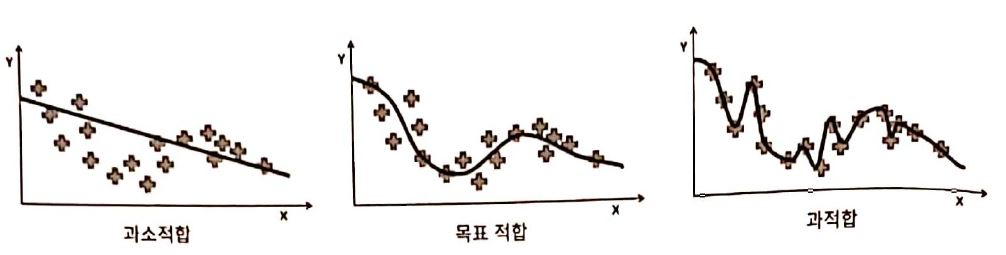

과소적합은 모델이 너무 단순한 것을, 과적합은 모델이 너무 복잡한 것을 확인할 수 있습니다!

## Reference
- [ 실전 텐서플로 2를 활용한 딥러닝 컴퓨터 비전] chapter 01


# 수고하셨습니다! ^^